Restarted social_learning (Python 3.9.18)

0 0.99609375
1 0.991302490234375
2 0.98583984375
3 0.979461669921875
FJ_iters: 3

        DataSource: erdos_renyi
        DataFile: 
        Random W: False
        #nodes: 256
        #articles: 10
        W_Sparse: 0.979461669921875
        Pr(y==1): 0.5828125
        P_range: (0.3, 0.9)
        Count Z<0: 1021, 0.398828125
        FJ_iters: 0
        repeat_exp: 1
        repeatk: 3
        
max_iteration:	 100
objective_random:0.00, 0.02, 0.03, 0.04, 0.07, 0.08, 0.09, 0.10, 0.10, 0.11, 0.12, 0.13, 0.13, 0.14, 0.15, 0.16, 0.17, 0.17, 0.19, 0.19, 0.20, 0.20, 0.21, 0.21, 0.23, 0.23, 0.24, 0.24, 0.25, 0.27, 0.27, 0.28, 0.29, 0.29, 0.30, 0.31, 0.32, 0.32, 0.33, 0.33, 0.35, 0.36, 0.37, 0.37, 0.37, 0.38, 0.39, 0.40, 0.41, 0.41, 0.42, 0.43, 0.44, 0.45, 0.45, 0.45, 0.46, 0.46, 0.47, 0.47, 0.48, 0.48, 0.49, 0.49, 0.49, 0.50, 0.51, 0.51, 0.52, 0.53, 0.53, 0.54, 0.54, 0.54, 0.55, 0.55, 0.55, 0.55, 0.56, 0.56, 0.57, 0.57, 0.57, 0.58, 0.59, 0.59, 0.59, 0.59, 0.60, 0.60, 0.60, 0.60, 0.61, 0.61, 0

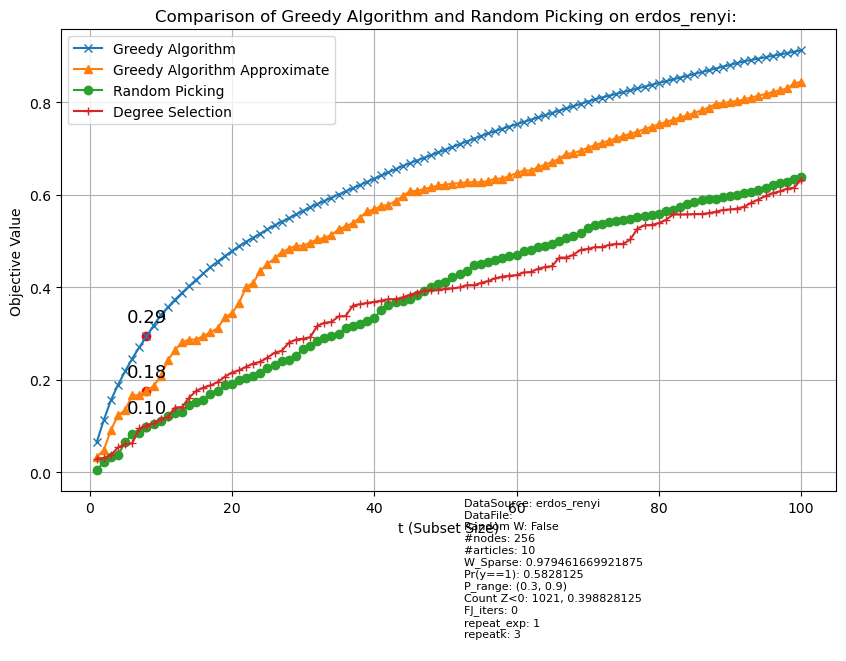

#steps==>0.5:	 [22.0, 31.0, 66.0, 75.0],
#steps==>0.6:	 [34.0, 44.0, 91.0, 95.0],
#steps==>0.7:	 [50.0, 69.0, 100.0, 100.0],
#steps==>0.8:	 [69.0, 89.0, 100.0, 100.0],
#steps==>0.9:	 [95.0, 100.0, 100.0, 100.0],
#steps==>0.95:	 [100.0, 100.0, 100.0, 100.0],
#steps==>0.99:	 [100.0, 100.0, 100.0, 100.0],


In [1]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle
from datetime import datetime

from utils import *
from data_loader import *

# # Create a dictionary mapping keywords to functions or objects
# switch_dict = {
#     'erdos_renyi': erdos_renyi_graph,
#     'watts_strogatz': watts_strogatz_graph,
#     'barabasi_albert': barabasi_albert_graph,
#     'real_dataset': load_real_dataset,
# }





def main():
    py_fname = "exp8_degree_"
    # n = 1024
    n=256
    k = 10
    rho = 0.05  # ratio of nonzeros in W
    p = 0.6 # Probability for 1 in y
    p_low = 0.3
    p_high = 0.9
    Prange=(p_low, p_high)

    randomW = True
    save_plot = True
    save_results = True
    FJ_maxiters = 3
    repeatk = 3
    FJ_iters = 0
    d=10

    datasrc = None
    file_path = ""
    max_iterations = 100
    early_stop = 0.99

    

    G=None

    # SEED=3
    repeat_exp = 1
    objective_greedys, objective_greedy_appros, objective_randoms,objective_degrees = np.ones([repeat_exp, n]), np.ones([repeat_exp, n]), np.ones([repeat_exp, n]), np.ones([repeat_exp, n])
    for i in range(repeat_exp):
        SEED = i
        random.seed(SEED)
        np.random.seed(SEED)
        

        datasrc = "erdos_renyi"
        W = select_model_or_dataset(datasource=datasrc, n=n, p=0.005, seed=SEED, directed=False, FJ_maxiters=FJ_maxiters)

        # datasrc = "barabasi_albert"
        # W = select_model_or_dataset(datasource=datasrc, n=n, m=5, seed=SEED)

        # datasrc = "watts_strogatz"
        # W = select_model_or_dataset(datasrc, n=n, k=5, p=0.25, FJ_maxiters=FJ_maxiters, seed=SEED)

        # datasrc = "random_W"
        # W = select_model_or_dataset(datasource=datasrc, n=n, rho=rho)

        # real data
        # datasrc = "real_dataset"
        # data_filenames = ['chesapeake.mtx', 'bio-celegansneural.mtx', 'delaunay_n10.mtx', 'polblogs.mtx', "soc-wiki-Vote.mtx", "fb-pages-food.edges.edges", "soc-hamsterster.edges"]
        # file_path = 'soc-hamsterster.edges'
        # W = select_model_or_dataset(datasource=datasrc, FJ_maxiters=FJ_maxiters, file_path=file_path, delimiter=' ')

        randomW = (datasrc == "random_W")

        n = W.shape[0]
        # Y = initialize_y(n, k, p)
        Y = initialize_y_with_randomP(n, k, Prange=Prange, seed=SEED)
        Z = W @ Y
        m = np.sum(Z < 0)
        d = math.ceil(math.log2(n))

        # print("datasource:\t",  datasrc)
        # print("number of nodes:\t", n)
        # print("number of articles:\t", k)
        # print("sparsity factor of W:\t", rho)
        # print("probability of 1 in y:\t", p)

        # print("Number of negative elements in Z: ", m)

        # Meta information
        meta_info = f"""
        DataSource: {datasrc}
        DataFile: {file_path}
        Random W: {randomW}
        #nodes: {Z.shape[0]}
        #articles: {Z.shape[1]}
        W_Sparse: {np.sum(W==0)/(W.size)}
        Pr(y==1): {np.sum(Y==1)/(Y.size)}
        P_range: {Prange}
        Count Z<0: {m}, {m/Z.size}
        FJ_iters: {FJ_iters}
        repeat_exp: {repeat_exp}
        repeatk: {repeatk}
        """
        print(meta_info)

        # total_iterations = 2 * int(math.sqrt(n)) + 1

        max_total_iterations = 0
        results, total_iterations =  experiment8(n, W, Y, Z, m=m, max_iterations=max_iterations, early_stop=early_stop, repeatk=repeatk)
        # print(results)
        objective_greedy, objective_greedy_appro, objective_random, objective_degree = results
        # print(len(objective_greedy))
        # print(len(objective_greedy_appro))
        # print(len(objective_random))
        objective_greedys[i,:total_iterations]=np.array(objective_greedy)
        objective_greedy_appros[i,:total_iterations]=np.array(objective_greedy_appro)
        objective_randoms[i,:total_iterations]=np.array(objective_random)
        objective_degrees[i,:total_iterations]=np.array(objective_degree)
        if total_iterations > max_total_iterations:
            max_total_iterations = total_iterations


   

    objective_greedy = np.mean(objective_greedys, axis=0)
    objective_greedy_appro = np.mean(objective_greedy_appros, axis=0)
    objective_random = np.mean(objective_randoms, axis=0)
    objective_degree = np.mean(objective_degrees, axis=0)
    print(max_total_iterations)
    print(f"cover ratio @ step {d}:\t", f"{objective_greedy[d-1]:.2f}", f"{objective_greedy_appro[d-1]:.2f}", f"{objective_random[d-1]:.2f}", f"{objective_degree[d-1]:.2f}")


    # dataset_names = ["ER", "PA", "WS", 'BIO', 'CSPK', 'FB', 'WIKI' ]

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    x_highlight = d
    y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    y_random = objective_random[x_highlight - 1]

    

    plt.scatter([x_highlight, x_highlight, x_highlight], [y_greedy, y_greedy_appro, y_random], color='red')

    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel('t (Subset Size)')
    plt.ylabel('Objective Value')
    plt.title(f'Comparison of Greedy Algorithm and Random Picking on {datasrc}: {file_path}')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    # plt.text(0.95, 0.05, meta_info, 
    #         fontsize=8, verticalalignment='bottom', horizontalalignment='right', transform=plt.gca().transAxes)

    # Meta information as caption
    plt.figtext(0.5, -0.15, meta_info, wrap=True, horizontalalignment='left', fontsize=8)
    plt.legend()
    plt.grid(True)


    current_datetime = datetime.now()
    timestamp = current_datetime.strftime('%Y-%m-%d-%H-%M-%S')

    dir_str = "./output/"
    fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    if save_plot:
        plot_fstr = f"{dir_str}plot_{fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)

    results_topkl = {
        "graph": datasrc,
        "filename": file_path,
        "matrixW": W, 
        "random_seed": SEED,
        "nodesize_n": n,
        "articlesize_k": k,
        "sparsity_rho": {np.sum(W==0)/(W.size)},  # Sparsity factor for W
        "probability1": p,  # Probability for 1 in y
        "negative_size": m,
        "results": results,
        "total_iteration": total_iterations,
        "timestamp": timestamp,
        "FJ_iters": FJ_iters,
        "repeat_exp": repeat_exp,
        "repeatk": repeatk,
    }

    if save_results:
        result_fstr = f"{dir_str}result_{fstr}_{timestamp}.pkl"
        with open(result_fstr, "wb") as file:
            pickle.dump(results_topkl, file)
        print("Save to ==> ", result_fstr)
    
    plt.show()
    
    
    
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for threshold in thresholds:
        step99s_greedy.append(np.mean(np.sum(objective_greedys<=threshold, axis=1), axis=0))
        step99s_greedy_appros.append(np.mean(np.sum(objective_greedy_appros<=threshold, axis=1), axis=0))
        step99s_randoms.append(np.mean(np.sum(objective_randoms<=threshold, axis=1), axis=0))
        step99s_degrees.append(np.mean(np.sum(objective_degrees<=threshold, axis=1), axis=0))


    for i, threshold in enumerate(thresholds):
        print(f"#steps==>{threshold}:\t [{step99s_greedy[i]}, {step99s_greedy_appros[i]}, {step99s_randoms[i]}, {step99s_degrees[i]}],"  )
        # print(f"step99s:\t", step99s)









if __name__ == '__main__':
    main()

Restarted social_learning (Python 3.9.18)

0 0.9921875
1 0.986328125
2 0.9820556640625
3 0.9786376953125
FJ_iters: 3

        DataSource: erdos_renyi
        DataFile: 
        Random W: False
        #nodes: 128
        #articles: 5
        W_Sparse: 0.9786376953125
        Pr(y==1): 0.625
        P_range: (0.3, 0.9)
        Count Z<0: 224, 0.35
        FJ_iters: 0
        repeat_exp: 1
        repeatk: 3
        
max_iteration:	 100
objective_random:0.02, 0.05, 0.06, 0.06, 0.08, 0.08, 0.11, 0.12, 0.14, 0.16, 0.17, 0.18, 0.19, 0.21, 0.22, 0.24, 0.24, 0.25, 0.26, 0.26, 0.28, 0.28, 0.29, 0.31, 0.32, 0.32, 0.33, 0.35, 0.35, 0.36, 0.36, 0.38, 0.39, 0.39, 0.41, 0.41, 0.42, 0.43, 0.44, 0.45, 0.47, 0.47, 0.48, 0.49, 0.51, 0.51, 0.52, 0.52, 0.53, 0.54, 0.55, 0.56, 0.56, 0.57, 0.58, 0.58, 0.59, 0.59, 0.60, 0.60, 0.60, 0.61, 0.62, 0.63, 0.64, 0.64, 0.64, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.68, 0.70, 0.71, 0.72, 0.74, 0.74, 0.74, 0.74, 0.75, 0.76, 0.76, 0.78, 0.78, 0.79, 0.79, 0.80, 0.80, 0.81, 0.81, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84,

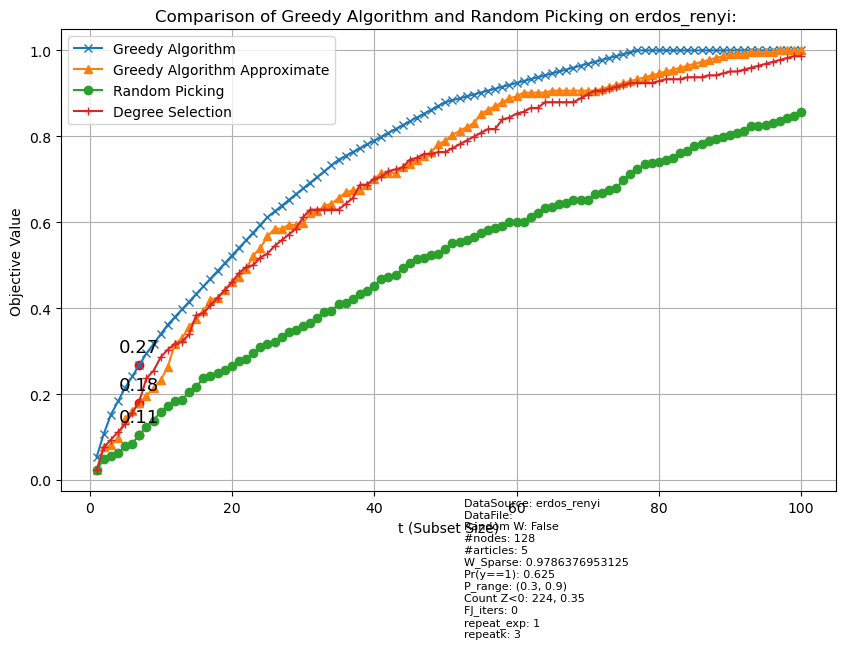

#steps==>0.5:	 [18.0, 22.0, 44.0, 23.0],
#steps==>0.6:	 [24.0, 30.0, 59.0, 29.0],
#steps==>0.7:	 [31.0, 39.0, 75.0, 39.0],
#steps==>0.8:	 [41.0, 50.0, 89.0, 54.0],
#steps==>0.9:	 [54.0, 60.0, 100.0, 70.0],
#steps==>0.95:	 [65.0, 80.0, 100.0, 89.0],
#steps==>0.99:	 [74.0, 89.0, 100.0, 100.0],


In [1]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle
from datetime import datetime

from utils import *
from data_loader import *

# # Create a dictionary mapping keywords to functions or objects
# switch_dict = {
#     'erdos_renyi': erdos_renyi_graph,
#     'watts_strogatz': watts_strogatz_graph,
#     'barabasi_albert': barabasi_albert_graph,
#     'real_dataset': load_real_dataset,
# }





def main():
    py_fname = "exp8_degree_"
    # n = 1024
    n=128
    # k = 10
    k=5
    rho = 0.05  # ratio of nonzeros in W
    p = 0.6 # Probability for 1 in y
    p_low = 0.3
    p_high = 0.9
    Prange=(p_low, p_high)

    randomW = True
    save_plot = True
    save_results = True
    FJ_maxiters = 3
    repeatk = 3
    FJ_iters = 0
    d=10

    datasrc = None
    file_path = ""
    max_iterations = 100
    early_stop = 0.99

    

    G=None

    # SEED=3
    repeat_exp = 1
    objective_greedys, objective_greedy_appros, objective_randoms,objective_degrees = np.ones([repeat_exp, n]), np.ones([repeat_exp, n]), np.ones([repeat_exp, n]), np.ones([repeat_exp, n])
    for i in range(repeat_exp):
        SEED = i
        random.seed(SEED)
        np.random.seed(SEED)
        

        datasrc = "erdos_renyi"
        W = select_model_or_dataset(datasource=datasrc, n=n, p=0.005, seed=SEED, directed=False, FJ_maxiters=FJ_maxiters)

        # datasrc = "barabasi_albert"
        # W = select_model_or_dataset(datasource=datasrc, n=n, m=5, seed=SEED)

        # datasrc = "watts_strogatz"
        # W = select_model_or_dataset(datasrc, n=n, k=5, p=0.25, FJ_maxiters=FJ_maxiters, seed=SEED)

        # datasrc = "random_W"
        # W = select_model_or_dataset(datasource=datasrc, n=n, rho=rho)

        # real data
        # datasrc = "real_dataset"
        # data_filenames = ['chesapeake.mtx', 'bio-celegansneural.mtx', 'delaunay_n10.mtx', 'polblogs.mtx', "soc-wiki-Vote.mtx", "fb-pages-food.edges.edges", "soc-hamsterster.edges"]
        # file_path = 'soc-hamsterster.edges'
        # W = select_model_or_dataset(datasource=datasrc, FJ_maxiters=FJ_maxiters, file_path=file_path, delimiter=' ')

        randomW = (datasrc == "random_W")

        n = W.shape[0]
        # Y = initialize_y(n, k, p)
        Y = initialize_y_with_randomP(n, k, Prange=Prange, seed=SEED)
        Z = W @ Y
        m = np.sum(Z < 0)
        d = math.ceil(math.log2(n))

        # print("datasource:\t",  datasrc)
        # print("number of nodes:\t", n)
        # print("number of articles:\t", k)
        # print("sparsity factor of W:\t", rho)
        # print("probability of 1 in y:\t", p)

        # print("Number of negative elements in Z: ", m)

        # Meta information
        meta_info = f"""
        DataSource: {datasrc}
        DataFile: {file_path}
        Random W: {randomW}
        #nodes: {Z.shape[0]}
        #articles: {Z.shape[1]}
        W_Sparse: {np.sum(W==0)/(W.size)}
        Pr(y==1): {np.sum(Y==1)/(Y.size)}
        P_range: {Prange}
        Count Z<0: {m}, {m/Z.size}
        FJ_iters: {FJ_iters}
        repeat_exp: {repeat_exp}
        repeatk: {repeatk}
        """
        print(meta_info)

        # total_iterations = 2 * int(math.sqrt(n)) + 1

        max_total_iterations = 0
        results, total_iterations =  experiment8(n, W, Y, Z, m=m, max_iterations=max_iterations, early_stop=early_stop, repeatk=repeatk)
        # print(results)
        objective_greedy, objective_greedy_appro, objective_random, objective_degree = results
        # print(len(objective_greedy))
        # print(len(objective_greedy_appro))
        # print(len(objective_random))
        objective_greedys[i,:total_iterations]=np.array(objective_greedy)
        objective_greedy_appros[i,:total_iterations]=np.array(objective_greedy_appro)
        objective_randoms[i,:total_iterations]=np.array(objective_random)
        objective_degrees[i,:total_iterations]=np.array(objective_degree)
        if total_iterations > max_total_iterations:
            max_total_iterations = total_iterations


   

    objective_greedy = np.mean(objective_greedys, axis=0)
    objective_greedy_appro = np.mean(objective_greedy_appros, axis=0)
    objective_random = np.mean(objective_randoms, axis=0)
    objective_degree = np.mean(objective_degrees, axis=0)
    print(max_total_iterations)
    print(f"cover ratio @ step {d}:\t", f"{objective_greedy[d-1]:.2f}", f"{objective_greedy_appro[d-1]:.2f}", f"{objective_random[d-1]:.2f}", f"{objective_degree[d-1]:.2f}")


    # dataset_names = ["ER", "PA", "WS", 'BIO', 'CSPK', 'FB', 'WIKI' ]

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    x_highlight = d
    y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    y_random = objective_random[x_highlight - 1]

    

    plt.scatter([x_highlight, x_highlight, x_highlight], [y_greedy, y_greedy_appro, y_random], color='red')

    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel('t (Subset Size)')
    plt.ylabel('Objective Value')
    plt.title(f'Comparison of Greedy Algorithm and Random Picking on {datasrc}: {file_path}')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    # plt.text(0.95, 0.05, meta_info, 
    #         fontsize=8, verticalalignment='bottom', horizontalalignment='right', transform=plt.gca().transAxes)

    # Meta information as caption
    plt.figtext(0.5, -0.15, meta_info, wrap=True, horizontalalignment='left', fontsize=8)
    plt.legend()
    plt.grid(True)


    current_datetime = datetime.now()
    timestamp = current_datetime.strftime('%Y-%m-%d-%H-%M-%S')

    dir_str = "./output/"
    fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    if save_plot:
        plot_fstr = f"{dir_str}plot_{fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)

    results_topkl = {
        "graph": datasrc,
        "filename": file_path,
        "matrixW": W, 
        "random_seed": SEED,
        "nodesize_n": n,
        "articlesize_k": k,
        "sparsity_rho": {np.sum(W==0)/(W.size)},  # Sparsity factor for W
        "probability1": p,  # Probability for 1 in y
        "negative_size": m,
        "results": results,
        "total_iteration": total_iterations,
        "timestamp": timestamp,
        "FJ_iters": FJ_iters,
        "repeat_exp": repeat_exp,
        "repeatk": repeatk,
    }

    if save_results:
        result_fstr = f"{dir_str}result_{fstr}_{timestamp}.pkl"
        with open(result_fstr, "wb") as file:
            pickle.dump(results_topkl, file)
        print("Save to ==> ", result_fstr)
    
    plt.show()
    
    
    
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for threshold in thresholds:
        step99s_greedy.append(np.mean(np.sum(objective_greedys<=threshold, axis=1), axis=0))
        step99s_greedy_appros.append(np.mean(np.sum(objective_greedy_appros<=threshold, axis=1), axis=0))
        step99s_randoms.append(np.mean(np.sum(objective_randoms<=threshold, axis=1), axis=0))
        step99s_degrees.append(np.mean(np.sum(objective_degrees<=threshold, axis=1), axis=0))


    for i, threshold in enumerate(thresholds):
        print(f"#steps==>{threshold}:\t [{step99s_greedy[i]}, {step99s_greedy_appros[i]}, {step99s_randoms[i]}, {step99s_degrees[i]}],"  )
        # print(f"step99s:\t", step99s)









if __name__ == '__main__':
    main()

No kernel connected